In [26]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
data = pd.read_csv('./raw_data/ml_data.csv', index_col=0)

In [33]:
data


,date_creation_diff,verified
0,438,1
1,0,1
2,-1,1
3,-1,1
4,-1,1
...,...,...
731,149,0
732,59,0
733,0,1
734,0,1


Visualisation
Models:
logistic reggression
decision trees - random forest

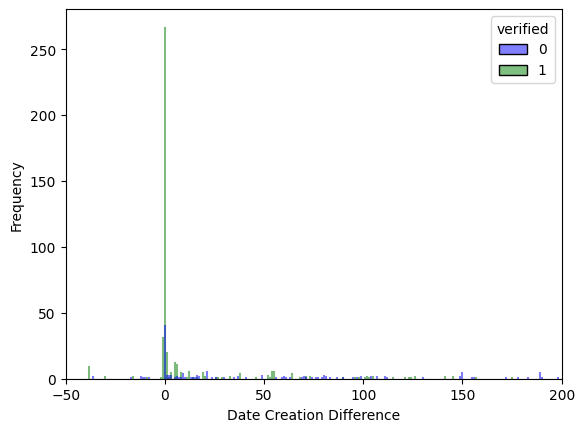

In [38]:
# verified_true = data.loc[data['verified']==1]
# verified_false = data.loc[data['verified']==0]

# Create the histogram
# Create the histogram
palette = {0: 'blue', 1: 'green'}
sns.histplot(data=data, x='date_creation_diff', hue='verified', bins=10, alpha=0.5, palette=palette, discrete=True)

# Add labels
plt.xlabel('Date Creation Difference')
plt.ylabel('Frequency')

lower_bound = -50
upper_bound = 200
plt.xlim(lower_bound, upper_bound)
# Display the plot
plt.show()

now we will create a decision tree

In [68]:
from sklearn.model_selection import train_test_split

y = data.verified.values
X = data.date_creation_diff.values
X=X.reshape(-1,1)

# assuming 'X' is your feature data and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create an instance of the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Use cross_val_predict to get the predicted labels for each sample in the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
x
print("Accuracy: %0.2f " % (accuracy))
print("F1-score: %0.2f" % f1)
print("Recall: %0.2f" % recall)
print("Precision: %0.2f" % precision)

Accuracy: 0.82 
F1-score: 0.81
Recall: 0.82
Precision: 0.81
